In [6]:
library(dplyr)
library(ggplot2)
library(ggwordcloud)
library(cowplot)

In [7]:
df <- read.table("../Metadata.txt", sep="\t", header=T, stringsAsFactors = FALSE)

In [8]:
# df_tfs <- read.csv("the-human-transcription-factors.csv")
df_tfs <- read.csv("the-human-transcription-factors.csv", stringsAsFactors = FALSE)

In [9]:
# df_tfs %>% filter(HGNC.symbol == "POLR2A") %>% head()

In [19]:
read_lengths <- df %>% pull(read_length) %>% unique()
read_lengths <- read_lengths[order(read_lengths)]

counts_df <- df %>% select(c(exp, run_type, read_length)) %>%
    unique() %>% 
    group_by(run_type, read_length) %>% 
    count() %>% 
    arrange(-read_length) %>%
    mutate(read_length = as.factor(read_length)) %>%
    mutate(label = label_comma()(n))
counts_df$read_length <- factor(counts_df$read_length, levels = read_lengths)

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `label = label_comma()(n)`.
[36mℹ[39m In group 1: `run_type = "paired-ended"` and `read_length = 36`.
[1mCaused by error in `label_comma()`:[22m
[33m![39m could not find function "label_comma"


In [11]:
options(repr.plot.width = 12, repr.plot.height = 4)
p <- ggplot(counts_df, aes(x = read_length, y = run_type, fill=n, label = label)) + 
    geom_tile(color="black") + 
    geom_text() + 
    scale_x_discrete("Read length") + 
    scale_y_discrete() + 
    coord_fixed() + 
    scale_fill_gradient("# Experiments", low = "white", high = "red") +  
    theme_cowplot() + 
    theme(axis.title.y = element_blank(), 
          axis.ticks = element_blank(), axis.line = element_blank())

p

ERROR: Error in eval(expr, envir, enclos): object 'counts_df' not found


In [15]:
generate_wordcloud <- function(df, read_length, run_type, max_size) {
  targets_df <- df %>% 
    filter(target != "Control") %>%
    filter(read_length == !!read_length, run_type == !!run_type) %>%
    select(exp, target) %>%
    unique() %>%
    group_by(target) %>%
    summarise(count = n()) %>%
    arrange(desc(count))

  set.seed(245)
  p <- ggplot(targets_df, aes(label = target, size = count)) +
    geom_text_wordcloud(aes(color = count)) +
    scale_size_area(max_size = !!max_size) +
    scale_color_gradient(low = "blue", high = "red") +
    theme_cowplot() +
    ggtitle(paste("Read Length:", read_length, "Run Type:", run_type))

  return(p)
}

,read_length,run_type
,<int>,<chr>
1,151,paired-ended
2,101,paired-ended
3,101,single-ended
4,100,paired-ended
5,100,single-ended
6,76,paired-ended


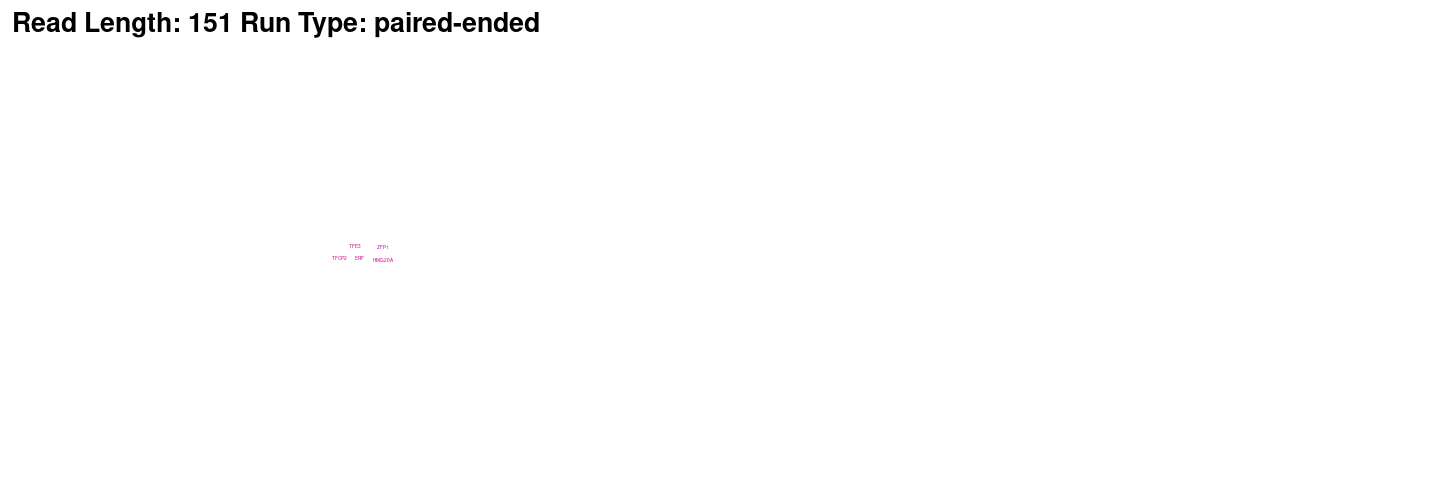

In [18]:
# Get unique combinations of read_length and run_type
combinations <- df %>%
  select(read_length, run_type) %>%
  unique() %>%
  arrange(desc(read_length), run_type)

combinations %>% head()

plot1 <- generate_wordcloud(df, combinations$read_length[1], combinations$run_type[1], 40)
# plot2 <- generate_wordcloud(df, combinations$read_length[2], combinations$run_type[2])
# plot3 <- generate_wordcloud(df, combinations$read_length[3], combinations$run_type[3])
# plot4 <- generate_wordcloud(df, combinations$read_length[4], combinations$run_type[4])
# plot5 <- generate_wordcloud(df, combinations$read_length[5], combinations$run_type[5])
# plot6 <- generate_wordcloud(df, combinations$read_length[6], combinations$run_type[6])
# plot7 <- generate_wordcloud(df, combinations$read_length[7], combinations$run_type[7])
# plot8 <- generate_wordcloud(df, combinations$read_length[8], combinations$run_type[8])
# plot9 <- generate_wordcloud(df, combinations$read_length[9], combinations$run_type[9])
# plot10 <- generate_wordcloud(df, combinations$read_length[10], combinations$run_type[10])

# Generate wordclouds for top N combinations
plots <- list(plot1)
# plots <- list(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10)

# Arrange plots in a grid
grid <- plot_grid(plotlist = plots, ncol = 2)

# Display the grid
print(grid)

# Save the grid to a file (optional)
ggsave("wordcloud_grid.png", grid, width = 40, height = 30, units = "in", dpi = 300)

In [ ]:
# Make a word cloud of the TFs for the experiments with a Read length of 36bp
# bonus points if you can color based on whether that TF is sequence specific or not (Is TF? column in 
# /data/common/genome/the-human-transcription-factors.csv)

In [19]:
# Convert the above to a function that takes the read length and run type as the arguments and returns 
# the corrsponding word cloud

In [78]:
# Use cowplot::plot_grid to plot a 5x2 panel of word clouds for the 10 most
# abundant combinations of read length and run type